# Devoir 1 optique


In [5]:
# Importations nécessaires.
import matplotlib.pyplot as plt
import numpy as np
import math

## Numéro 1 a)

Graphique de l'indice de réfraction de la silice sur la plage de longueur d'onde $1,0<\lambda<1,6$.

L'équation de Sellmeier est:
$$n = \sqrt{1 + \sum_{i=1}^m \frac{A_i \lambda^2}{\lambda^2-\lambda_i^2}}$$

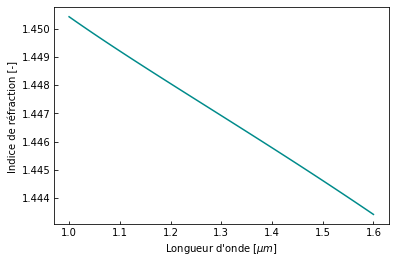

In [6]:
# Cefficients de Sellmeier et longueurs d'onde associées en micromètre
A_i = [0.696166, 0.407942, 0.897479]
lambda_i =[0.068404, 0.116241, 9.896161]

# Plage de longueur d'onde en x, le lambda dans l'équation
x = np.linspace(1, 1.6, 50)

# Équation 
somme = 0 
for count, item in enumerate(A_i):
    somme += (A_i[count] *x**2)/(x**2 - lambda_i[count]**2)

n = (1 + somme)**0.5

axes = plt.gca()

plt.plot(x, n, c="#008B8B")
plt.xlabel("Longueur d'onde [$\mu m$]")
plt.ylabel("Indice de réfraction [-] ")

axes.yaxis.set_tick_params(direction='in')
axes.xaxis.set_tick_params(direction='in')
#plt.savefig(fname='graphique_1a', dpi=300)
plt.show()

## Numéro 1 b)

Traçons le graphique de la dispersion $D$ sur la plage de longueur d'onde $1,0<\lambda<1,6$.

La dispersion est nulle pour une longueur d'onde de 1.2769 um.


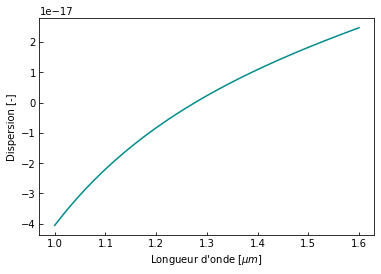

In [3]:
# Vitesse de la lumière en micromètre
c = 3e14

# Cefficients de Sellmeier et longueurs d'onde associées en micromètre
A_i = [0.696166, 0.407942, 0.897479]
lambda_i =[0.068404, 0.116241, 9.896161]

# Plage de longueur d'onde en x, le lambda dans l'équation
x = np.linspace(1, 1.6, 300)


# Différentes sommes présentes dans l'équation, que je nomme de 1 à 3 arbitrairement.
somme_1 = 0
somme_2 = 0
somme_3 = 0

for count, item in enumerate(A_i):
    somme_1 += (A_i[count]*x**2)/(x**2-lambda_i[count]**2)
    somme_2 += (-2 * A_i[count] * lambda_i[count]**2 * x) / ((x**2-lambda_i[count]**2)**2)
    somme_3 += (2* A_i[count]* lambda_i[count]**2 * (lambda_i[count]**2 + 3*x**2))/((x**2-lambda_i[count]**2)**3)
    

# Équation de la dispersion
D = list((-x/c) *( -0.25*((1+somme_1)**(-3/2)*(somme_2)*somme_3) + 1/2*(1+somme_1)**(-1/2) * (somme_3)))

# Trouver la longueur d'onde quand la dispersion est nulle
#print(D)
print(f"La dispersion est nulle pour une longueur d'onde de {round(x[D.index(3.8998707254319704e-20)],4)} um.")


# création du graphique
plt.plot(x, D, c="#008B8B")
plt.xlabel("Longueur d'onde [$\mu m$]")
plt.ylabel("Dispersion [-]")

axes = plt.gca()
axes.yaxis.set_tick_params(direction='in')
axes.xaxis.set_tick_params(direction='in')

#plt.savefig(fname='graphique_1b', dpi=300)
plt.show()


## Numéro 2 b)

J'ai une équation que l'on cherche $\nu_{max}$, mais impossible analytiquement, soit:
$$3\left(1-e^{-\frac{h\nu_{max}}{k_B T}}\right)=\frac{h\nu_{max}}{k_B T}$$

avec $T=1000$ K.

Essayons de trouver l'intersection entre les deux courbes.

 La fréquence maximale correspond à nu_max = 5.853E+13.


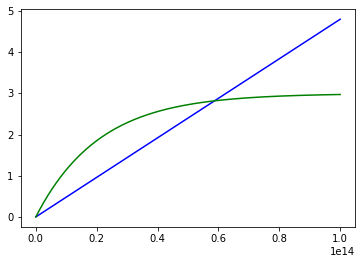

In [4]:
# Constantes utiles
h = 6.63e-34
k= 1.38e-23
T = 1000

nu = np.linspace(1, 1e14, 300)

# Les deux courbes
lin = (h*nu)/(k*T)
exp = 3 * (1-math.e**(-(h*nu)/(k*T)))


# Trouvons le point d'intersection, pour avoir la valeur en x
ind = np.argwhere(np.diff(np.sign(lin-exp))).flatten()
valeur = float(nu[ind])
print(f" La fréquence maximale correspond à nu_max = {valeur:.3E}.") 



# Tracer courbes pour voir 
plt.plot(nu, lin, 'b')
plt.plot(nu, exp, 'g')
plt.show()